In [348]:
def evaluate_compare_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [349]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.family"] = "Times New Roman"
score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test', 'F1 macro Train', 'F1 macro Test'])

# Step 2: Load the Dataset
# Replace 'BNB-USD.csv' with your dataset file
data = pd.read_csv('https://raw.githubusercontent.com/nilayamkamila/block-chain-intelligent-machine/refs/heads/main/block-chain-machine-learning/block-chain/data/blockchain-kinesis-data-stream-realtime_10000')

# Step 3: Data Exploration
print(data.head())  # Display the first 5 rows
print(data.info())  # Check for missing values and data types

# Step 4: Preprocess the Data
# Convert the Date column to datetime format if present
# data['Date'] = pd.to_datetime(data['Date'])

# Create a target column: Price_Change (1 for increase, 0 for decrease)
#data['tokenTrusted'] = (data['closingValue'] > data['openingValue']).astype(int)
data['tokenTrusted'] = ((data['closingValue'] > data['openingValue']) 
                        & (data['highestValue'] > data['lowestValue'])
                        &(data['adjClose'] > 0.6)
                        &(data['volumeStocks'] > 75000)
                        &(data['userCreditRating'] > 0.25)).astype(int)
#data['tokenTrusted'] = (data['highestValue'] > data['lowestValue']).astype(int)

# Select features (X) and target (y)
X = data[['openingValue','closingValue','highestValue','lowestValue','volumeStocks','userFollowers','userFriends','userCreditRating'
]]  # Replace with relevant features from your dataset
y = data['tokenTrusted']  # Target variable

# Handle missing values (if any)
X.fillna(method='ffill', inplace=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Step 5: Train the Decision Tree Classifier
classifier = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
classifier.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = classifier.predict(X_test)

# Step 7: Evaluate the Model
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Detailed Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

  currencyId  openingValue  closingValue  highestValue   lowestValue  \
0   b97dd280  8.504388e+06  7.500201e+06  8.403613e+06  9.312063e+05   
1   423983cf  4.354998e+06  3.675185e+06  5.080516e+06  3.535831e+06   
2   a32f5e1b  2.731458e+06  7.051552e+06  7.455965e+06  9.067772e+06   
3   b398657d  6.899512e+06  2.764412e+05  5.424323e+05  6.523481e+06   
4   b84498b9  7.893790e+06  3.733701e+06  8.018187e+06  5.703108e+06   

       adjClose  volumeStocks                          userIdentity  \
0  3.404214e+06        895787  7b4895b1-ec4a-40d3-a901-9779e74b6e60   
1  8.874550e+05        830717  2517406f-d4ac-4b0c-8fe4-1633931ddec1   
2  4.083624e+06        932059  82f963ee-7ac3-486d-9d95-19da06598ccc   
3  5.734940e+06        784108  85df5246-e52d-47ab-b31a-e4f13f65be0f   
4  7.229392e+06        886900  4e5f2096-f562-4147-b2a5-52b0865a1836   

   userFollowers  userFriends  userVerified  userCreditRating  \
0          19635         5232          True          0.425550   
1         

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [350]:
def evaluate_model(clf, x_train, x_test, y_train, y_test):
    '''The function will take model, x train, x test, y train, y test
    and then it will fit the model, then make predictions on the trained model,
    it will then print roc-auc score of train and test, then plot the roc, auc curve,
    print confusion matrix for train and test, then print classification report for train and test,
    then plot the feature importances if the model has feature importances,
    and finally it will return the following scores as a list:
    recall_train, recall_test, acc_train, acc_test, F1_train, F1_test
    '''

    # Fit the model to the training data.
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)
    fig, ax = plt.subplots(1, 2, figsize=(11,4))
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")


    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")
    plt.tight_layout()
    plt.show()


    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    print(cr_train)
    #sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    print(cr_test)
    crt = pd.DataFrame(cr_train)
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test)
    sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, F1_train, F1_test ]
    #sns.heatmap(pd.DataFrame(model_score).T.iloc[:, :-1], annot=True, cmap="Blues")
    print(model_score)
    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, F1_train, F1_test ]
    return model_score

In [351]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Ensure y_test and y_pred are defined
# Example: y_test = actual labels, y_pred = predicted labels from the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print to verify the values
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.904
Precision: 0.7698289269051322
Recall: 0.6771545827633378
F1 Score: 0.7205240174672488


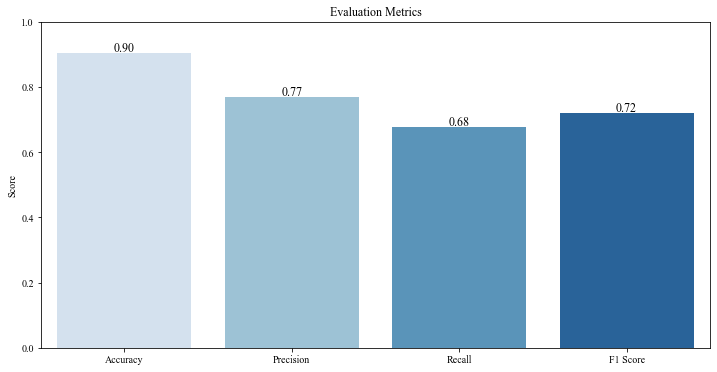

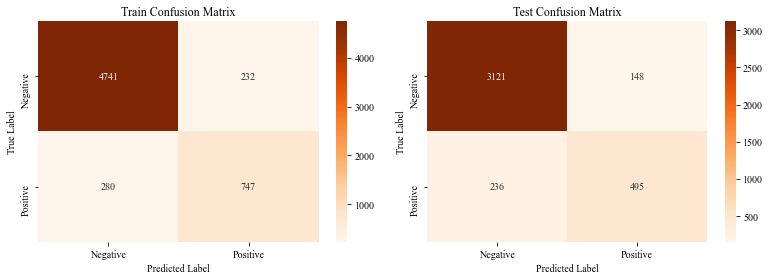


Train Classification Report:
{'0': {'precision': 0.9442342162915753, 'recall': 0.953348079630002, 'f1-score': 0.9487692615569342, 'support': 4973}, '1': {'precision': 0.763023493360572, 'recall': 0.7273612463485881, 'f1-score': 0.744765702891326, 'support': 1027}, 'accuracy': 0.9146666666666666, 'macro avg': {'precision': 0.8536288548260736, 'recall': 0.8403546629892951, 'f1-score': 0.8467674822241301, 'support': 6000}, 'weighted avg': {'precision': 0.9132169808832187, 'recall': 0.9146666666666666, 'f1-score': 0.9138506524320043, 'support': 6000}}

Test Classification Report:
{'0': {'precision': 0.9296991361334525, 'recall': 0.954726215968186, 'f1-score': 0.9420464835496528, 'support': 3269}, '1': {'precision': 0.7698289269051322, 'recall': 0.6771545827633378, 'f1-score': 0.7205240174672488, 'support': 731}, 'accuracy': 0.904, 'macro avg': {'precision': 0.8497640315192923, 'recall': 0.8159403993657619, 'f1-score': 0.8312852505084508, 'support': 4000}, 'weighted avg': {'precision': 0.9

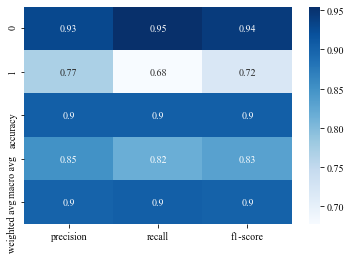

In [352]:
# Import seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Define the metrics and their values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=metrics, y=values, palette='Blues')  # Use a valid palette
plt.title('Evaluation Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Limit y-axis to valid metric range
for i, v in enumerate(values):
    plt.text(i, v + 0.005, f"{v:.2f}", ha='center', fontsize=12)  # Add value labels above bars
plt.show()
dt_score = evaluate_model(classifier, X_train, X_test, y_train, y_test)
dt_compare_model_score=evaluate_compare_model(classifier, X_test, y_test)
score['Decision Tree'] = dt_score

Accuracy: 0.96775
Precision: 0.9854838709677419
Recall: 0.8358413132694938
F1 Score: 0.9045151739452258

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      3269
           1       0.99      0.84      0.90       731

    accuracy                           0.97      4000
   macro avg       0.97      0.92      0.94      4000
weighted avg       0.97      0.97      0.97      4000



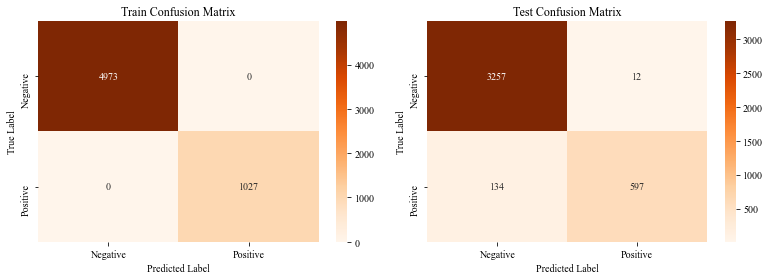


Train Classification Report:
{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4973}, '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1027}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 6000}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 6000}}

Test Classification Report:
{'0': {'precision': 0.9604836331465645, 'recall': 0.9963291526460691, 'f1-score': 0.9780780780780781, 'support': 3269}, '1': {'precision': 0.9802955665024631, 'recall': 0.8166894664842681, 'f1-score': 0.891044776119403, 'support': 731}, 'accuracy': 0.9635, 'macro avg': {'precision': 0.9703895998245138, 'recall': 0.9065093095651686, 'f1-score': 0.9345614270987406, 'support': 4000}, 'weighted avg': {'precision': 0.9641042639673549, 'recall': 0.9635, 'f1-score': 0.9621727421451302, 'support': 4000}}

Test Classification Report:
[1.0, 0.9641042639673549, 1.0, 0.9635, 1.0, 0.9635, 1.0, 0.9621727421451302]


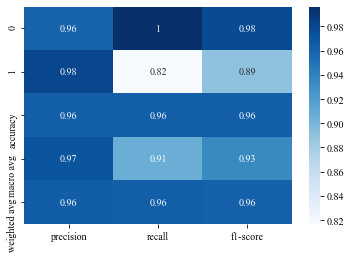

In [353]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100)  
rf.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = rf.predict(X_test)

# Step 7: Evaluate the Model
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Detailed Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))
rf_score = evaluate_model(rf, X_train, X_test, y_train, y_test)
rf_compare_model_score=evaluate_compare_model(rf, X_test, y_test)
score['Random Forest'] = rf_score

In [354]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
sc = StandardScaler()
sc.fit(X_train)
x_train_std = sc.transform(X_train)
x_test_std = sc.transform(X_test)
# Instantiate the Support Vector Classifier (SVC)
svc = SVC(C=1.0, random_state=10, kernel='linear',gamma='auto', probability=True)
# Step 6: Make Predictions
svc.fit(x_train_std, y_train)
# Make the predictions
y_pred = svc.predict(x_test_std)


# Step 7: Evaluate the Model
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Detailed Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))
#sc_score = evaluate_model(svc, x_train_std, x_test_std, y_train, y_test)
#svc_compare_model_score=evaluate_compare_model(svc, x_test_std, y_test)
#svc_compare_model_score

Accuracy: 0.879
Precision: 0.7546391752577319
Recall: 0.5006839945280438
F1 Score: 0.6019736842105263

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      3269
           1       0.75      0.50      0.60       731

    accuracy                           0.88      4000
   macro avg       0.83      0.73      0.77      4000
weighted avg       0.87      0.88      0.87      4000




ACCURACY OF THE MODEL: 0.879


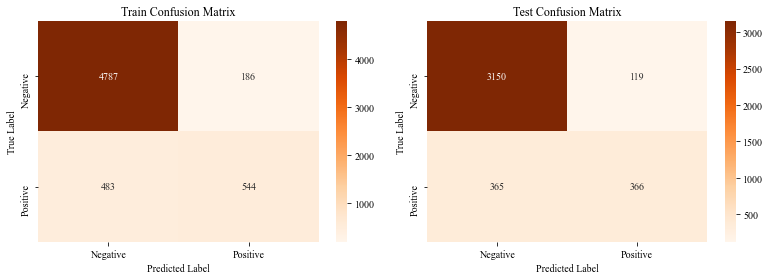


Train Classification Report:
{'0': {'precision': 0.9083491461100569, 'recall': 0.9625980293585361, 'f1-score': 0.9346871033876794, 'support': 4973}, '1': {'precision': 0.7452054794520548, 'recall': 0.5296981499513145, 'f1-score': 0.6192373363688104, 'support': 1027}, 'accuracy': 0.8885, 'macro avg': {'precision': 0.8267773127810558, 'recall': 0.7461480896549253, 'f1-score': 0.7769622198782449, 'support': 6000}, 'weighted avg': {'precision': 0.8804243885004289, 'recall': 0.8885, 'f1-score': 0.880692618266283, 'support': 6000}}

Test Classification Report:
{'0': {'precision': 0.8961593172119487, 'recall': 0.9635974304068522, 'f1-score': 0.9286556603773585, 'support': 3269}, '1': {'precision': 0.7546391752577319, 'recall': 0.5006839945280438, 'f1-score': 0.6019736842105263, 'support': 731}, 'accuracy': 0.879, 'macro avg': {'precision': 0.8253992462348403, 'recall': 0.7321407124674479, 'f1-score': 0.7653146722939423, 'support': 4000}, 'weighted avg': {'precision': 0.8702965112698156, 'rec

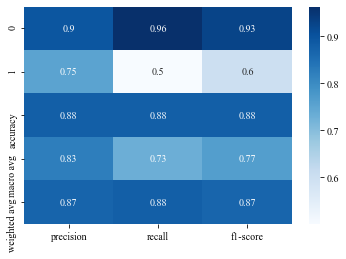

In [355]:
from sklearn import metrics  
print()
print("ACCURACY OF THE MODEL:", metrics.accuracy_score(y_test, y_pred))
svc.fit(x_train_std, y_train)
y_pred_train = svc.predict(x_train_std)
y_pred_test = svc.predict(x_test_std)
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)
fig, ax = plt.subplots(1, 2, figsize=(11,4))
sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
ax[0].set_xlabel("Predicted Label")
ax[0].set_ylabel("True Label")
ax[0].set_title("Train Confusion Matrix")


sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
ax[1].set_xlabel("Predicted Label")
ax[1].set_ylabel("True Label")
ax[1].set_title("Test Confusion Matrix")
plt.tight_layout()
plt.show()


cr_train = classification_report(y_train, y_pred_train, output_dict=True)
cr_test = classification_report(y_test, y_pred_test, output_dict=True)
print("\nTrain Classification Report:")
print(cr_train)
#sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
print("\nTest Classification Report:")
print(cr_test)
#crt = pd.DataFrame(cr_train)
print("\nTest Classification Report:")
crt2 = pd.DataFrame(cr_test)
sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")

precision_train = cr_train['weighted avg']['precision']
precision_test = cr_test['weighted avg']['precision']

recall_train = cr_train['weighted avg']['recall']
recall_test = cr_test['weighted avg']['recall']

acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

F1_train = cr_train['weighted avg']['f1-score']
F1_test = cr_test['weighted avg']['f1-score']

model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, F1_train, F1_test ]
#sns.heatmap(pd.DataFrame(model_score).T.iloc[:, :-1], annot=True, cmap="Blues")
print(model_score)
score['SVC']= model_score

In [356]:
from sklearn import metrics
# Predict Test Data 
y_pred = svc.predict(x_test_std)
# Calculate accuracy, precision, recall, f1-score, and kappa score
acc = metrics.accuracy_score(y_test, y_pred)
prec = metrics.precision_score(y_test, y_pred)
rec = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
kappa = metrics.cohen_kappa_score(y_test, y_pred)

# Calculate area under curve (AUC)
y_pred_proba = svc.predict_proba(x_test_std)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Display confussion matrix
cm = metrics.confusion_matrix(y_test, y_pred)

svc_compare_model_score={'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}
svc_compare_model_score

{'acc': 0.879,
 'prec': 0.7546391752577319,
 'rec': 0.5006839945280438,
 'f1': 0.6019736842105263,
 'kappa': 0.5340475050121182,
 'fpr': array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.05903946e-04,
        3.05903946e-04, 6.11807892e-04, 6.11807892e-04, 9.17711838e-04,
        9.17711838e-04, 1.22361578e-03, 1.22361578e-03, 1.52951973e-03,
        1.52951973e-03, 1.83542368e-03, 1.83542368e-03, 2.14132762e-03,
        2.14132762e-03, 2.44723157e-03, 2.44723157e-03, 2.75313552e-03,
        2.75313552e-03, 3.05903946e-03, 3.05903946e-03, 3.36494341e-03,
        3.36494341e-03, 3.67084735e-03, 3.67084735e-03, 4.28265525e-03,
        4.28265525e-03, 4.58855919e-03, 4.58855919e-03, 4.89446314e-03,
        4.89446314e-03, 5.50627103e-03, 5.50627103e-03, 5.81217498e-03,
        5.81217498e-03, 6.42398287e-03, 6.42398287e-03, 6.72988682e-03,
        6.72988682e-03, 7.34169471e-03, 7.34169471e-03, 7.95350260e-03,
        7.95350260e-03, 8.25940655e-03, 8.25940655e-03, 8.56531049e-03,


Accuracy: 0.891
Precision: 0.7080394922425952
Recall: 0.6867305061559508
F1 Score: 0.6972222222222223

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93      3269
           1       0.71      0.69      0.70       731

    accuracy                           0.89      4000
   macro avg       0.82      0.81      0.82      4000
weighted avg       0.89      0.89      0.89      4000



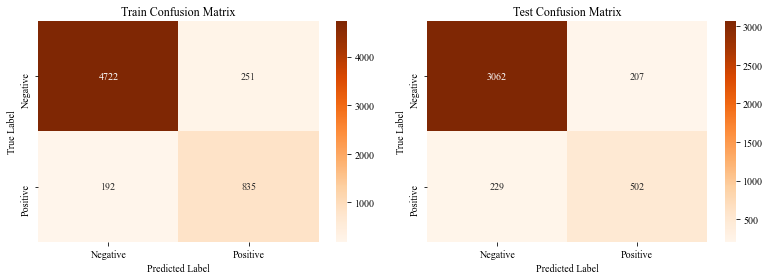


Train Classification Report:
{'0': {'precision': 0.960927960927961, 'recall': 0.9495274482203901, 'f1-score': 0.955193688682108, 'support': 4973}, '1': {'precision': 0.7688766114180479, 'recall': 0.813047711781889, 'f1-score': 0.790345480359678, 'support': 1027}, 'accuracy': 0.9261666666666667, 'macro avg': {'precision': 0.8649022861730045, 'recall': 0.8812875800011395, 'f1-score': 0.8727695845208929, 'support': 6000}, 'weighted avg': {'precision': 0.9280551716035141, 'recall': 0.9261666666666667, 'f1-score': 0.9269771703575852, 'support': 6000}}

Test Classification Report:
{'0': {'precision': 0.9304162868429049, 'recall': 0.9366778831446926, 'f1-score': 0.9335365853658536, 'support': 3269}, '1': {'precision': 0.7080394922425952, 'recall': 0.6867305061559508, 'f1-score': 0.6972222222222223, 'support': 731}, 'accuracy': 0.891, 'macro avg': {'precision': 0.81922788954275, 'recall': 0.8117041946503216, 'f1-score': 0.815379403794038, 'support': 4000}, 'weighted avg': {'precision': 0.8897

{'acc': 0.891,
 'prec': 0.7080394922425952,
 'rec': 0.6867305061559508,
 'f1': 0.6972222222222223,
 'kappa': 0.6307777252266462,
 'fpr': array([0.        , 0.00611808, 0.01927195, 0.04252065, 0.06332212,
        0.09941878, 0.14163353, 0.19455491, 1.        ]),
 'tpr': array([0.        , 0.07387141, 0.23529412, 0.45827633, 0.68673051,
        0.88235294, 0.9630643 , 0.99452804, 1.        ]),
 'auc': 0.9445424601791316,
 'cm': array([[3062,  207],
        [ 229,  502]])}

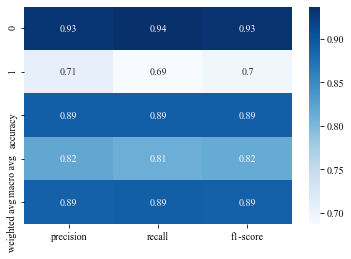

In [357]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=7) 
knn.fit(X_train, y_train) 
y_pred = knn.predict(X_test)

# Step 7: Evaluate the Model
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Detailed Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))
knn_score = evaluate_model(knn, X_train, X_test, y_train, y_test)
score['K Neighbours']= knn_score
knn_compare_model_score=evaluate_compare_model(knn, X_test, y_test)
knn_compare_model_score

Accuracy: 0.8335
Precision: 0.7210884353741497
Recall: 0.14500683994528044
F1 Score: 0.24145785876993167

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91      3269
           1       0.72      0.15      0.24       731

    accuracy                           0.83      4000
   macro avg       0.78      0.57      0.57      4000
weighted avg       0.82      0.83      0.78      4000



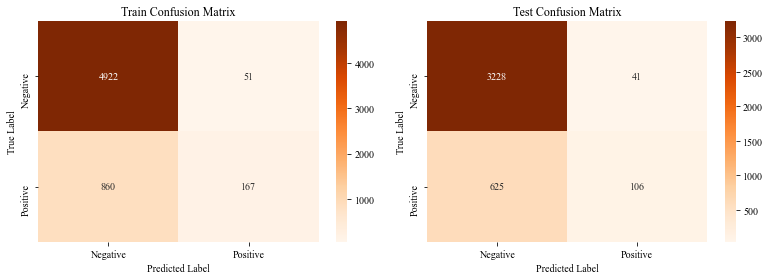


Train Classification Report:
{'0': {'precision': 0.8512625389138706, 'recall': 0.989744620953147, 'f1-score': 0.915295211529521, 'support': 4973}, '1': {'precision': 0.7660550458715596, 'recall': 0.1626095423563778, 'f1-score': 0.26827309236947794, 'support': 1027}, 'accuracy': 0.8481666666666666, 'macro avg': {'precision': 0.8086587923927151, 'recall': 0.5761770816547624, 'f1-score': 0.5917841519494995, 'support': 6000}, 'weighted avg': {'precision': 0.8366778563547951, 'recall': 0.8481666666666666, 'f1-score': 0.8045465921332936, 'support': 6000}}

Test Classification Report:
{'0': {'precision': 0.8377887360498313, 'recall': 0.9874579382074029, 'f1-score': 0.9064869418702611, 'support': 3269}, '1': {'precision': 0.7210884353741497, 'recall': 0.14500683994528044, 'f1-score': 0.24145785876993167, 'support': 731}, 'accuracy': 0.8335, 'macro avg': {'precision': 0.7794385857119905, 'recall': 0.5662323890763417, 'f1-score': 0.5739724003200964, 'support': 4000}, 'weighted avg': {'precision

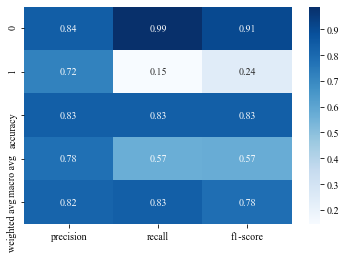

In [358]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train, y_train) 
y_pred = mlp.predict(X_test)

# Step 7: Evaluate the Model
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Detailed Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))
mlp_score = evaluate_model(mlp, X_train, X_test, y_train, y_test)
score['MLP']= mlp_score
mlp_compare_model_score=evaluate_compare_model(mlp, X_test, y_test)

Accuracy: 0.8545
Precision: 0.7335423197492164
Recall: 0.320109439124487
F1 Score: 0.4457142857142858

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.92      3269
           1       0.73      0.32      0.45       731

    accuracy                           0.85      4000
   macro avg       0.80      0.65      0.68      4000
weighted avg       0.84      0.85      0.83      4000



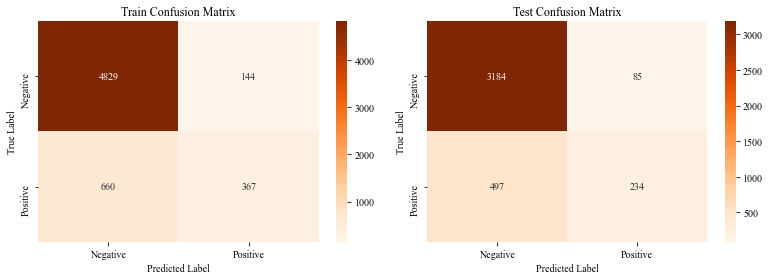


Train Classification Report:
{'0': {'precision': 0.8797595190380761, 'recall': 0.971043635632415, 'f1-score': 0.9231504492448863, 'support': 4973}, '1': {'precision': 0.7181996086105675, 'recall': 0.35735150925024345, 'f1-score': 0.4772431729518855, 'support': 1027}, 'accuracy': 0.866, 'macro avg': {'precision': 0.7989795638243218, 'recall': 0.6641975724413293, 'f1-score': 0.7001968110983859, 'support': 6000}, 'weighted avg': {'precision': 0.8521058477032342, 'recall': 0.866, 'f1-score': 0.846825987119401, 'support': 6000}}

Test Classification Report:
{'0': {'precision': 0.8649823417549579, 'recall': 0.973998164576323, 'f1-score': 0.9162589928057554, 'support': 3269}, '1': {'precision': 0.7335423197492164, 'recall': 0.320109439124487, 'f1-score': 0.4457142857142858, 'support': 731}, 'accuracy': 0.8545, 'macro avg': {'precision': 0.7992623307520872, 'recall': 0.6470538018504051, 'f1-score': 0.6809866392600206, 'support': 4000}, 'weighted avg': {'precision': 0.8409616777334086, 'recall

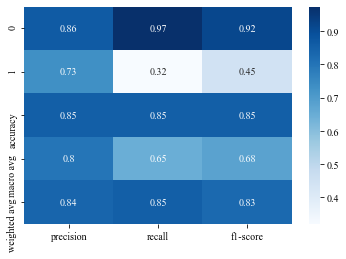

In [359]:
from sklearn.naive_bayes import GaussianNB
gussianNaiveBayes = GaussianNB()
gussianNaiveBayes.fit(X_train, y_train) 
y_pred = gussianNaiveBayes.predict(X_test)

# Step 7: Evaluate the Model
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Detailed Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))
gussianNaiveBayes_score = evaluate_model(gussianNaiveBayes, X_train, X_test, y_train, y_test)
score['Naive Bayes']= gussianNaiveBayes_score
gussianNaiveBayes_compare_model_score=evaluate_compare_model(gussianNaiveBayes, X_test, y_test)

[11:32:01] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.98525
Precision: 0.9602739726027397
Recall: 0.9589603283173734
F1 Score: 0.9596167008898014

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3269
           1       0.96      0.96      0.96       731

    accuracy                           0.99      4000
   macro avg       0.98      0.98      0.98      4000
weighted avg       0.99      0.99      0.99      4000

[11:32:02] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the

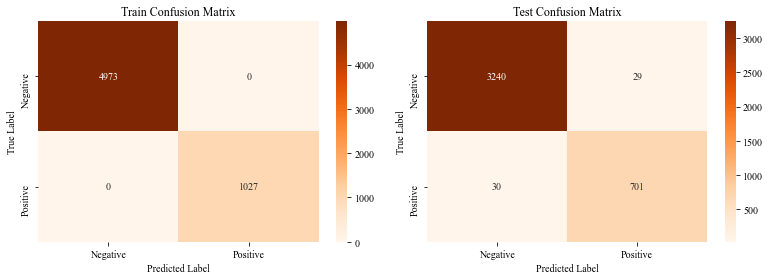


Train Classification Report:
{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4973}, '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1027}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 6000}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 6000}}

Test Classification Report:
{'0': {'precision': 0.9908256880733946, 'recall': 0.9911287855613338, 'f1-score': 0.9909772136412296, 'support': 3269}, '1': {'precision': 0.9602739726027397, 'recall': 0.9589603283173734, 'f1-score': 0.9596167008898014, 'support': 731}, 'accuracy': 0.98525, 'macro avg': {'precision': 0.9755498303380672, 'recall': 0.9750445569393535, 'f1-score': 0.9752969572655155, 'support': 4000}, 'weighted avg': {'precision': 0.9852423620711325, 'recall': 0.98525, 'f1-score': 0.9852460799359061, 'support': 4000}}

Test Classification Report:
[1.0, 0.9852423620711325, 1.0, 0.98525, 1.0, 0.98525, 1.0, 0.9852460799359

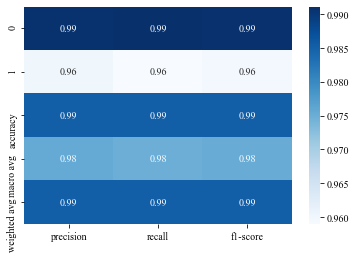

In [360]:
import xgboost as xgb
xgb = xgb.XGBClassifier(use_label_encoder=False)
xgb.fit(X_train, y_train) 
y_pred = xgb.predict(X_test)

# Step 7: Evaluate the Model
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Detailed Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))
xgb_score = evaluate_model(xgb, X_train, X_test, y_train, y_test)
score['XGB']= xgb_score
xgb_compare_model_score=evaluate_compare_model(xgb, X_test, y_test)

In [361]:
score

,Decision Tree,Random Forest,SVC,K Neighbours,MLP,Naive Bayes,XGB
Precision Train,0.913217,1.000000,0.880424,0.928055,0.836678,0.852106,1.000000
Precision Test,0.900483,0.964104,0.870297,0.889777,0.816462,0.840962,0.985242
Recall Train,0.914667,1.000000,0.888500,0.926167,0.848167,0.866000,1.000000
Recall Test,0.904000,0.963500,0.879000,0.891000,0.833500,0.854500,0.985250
Accuracy Train,0.914667,1.000000,0.888500,0.926167,0.848167,0.866000,1.000000
Accuracy Test,0.904000,0.963500,0.879000,0.891000,0.833500,0.854500,0.985250
F1 macro Train,0.913851,1.000000,0.880693,0.926977,0.804547,0.846826,1.000000
F1 macro Test,0.901563,0.962173,0.868955,0.890350,0.784953,0.830267,0.985246


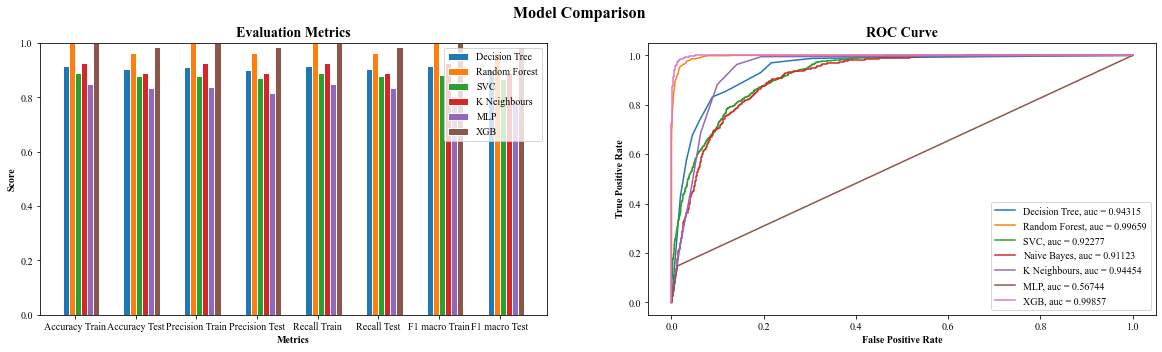

[0.         0.01927195 0.03242582 0.04527378 0.06393392 0.06668706
 0.08871214 0.11501988 0.13062099 0.19333129 0.21657999 0.26246559
 0.30437443 0.42490058 1.        ]
[0.         0.42818057 0.57592339 0.67715458 0.74829001 0.75649795
 0.83173735 0.85225718 0.86730506 0.93023256 0.96990424 0.97948016
 0.9876881  0.99042408 1.        ]


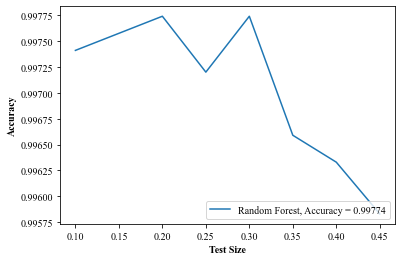

In [381]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(5)
fig.set_figwidth(20)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.1
score['Decision Tree']['Accuracy Test']
#precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, F1_train, F1_test
dtc_score = [score['Decision Tree']['Accuracy Train'], score['Decision Tree']['Accuracy Test'], score['Decision Tree']['Precision Train'], score['Decision Tree']['Precision Test'], score['Decision Tree']['Recall Train'], score['Decision Tree']['Recall Test'], score['Decision Tree']['F1 macro Train'], score['Decision Tree']['F1 macro Test']]
rf_score = [score['Random Forest']['Accuracy Train'], score['Random Forest']['Accuracy Test'], score['Random Forest']['Precision Train'], score['Random Forest']['Precision Test'], score['Random Forest']['Recall Train'], score['Random Forest']['Recall Test'], score['Random Forest']['F1 macro Train'], score['Random Forest']['F1 macro Test']]
svc_score = [score['SVC']['Accuracy Train'], score['SVC']['Accuracy Test'], score['SVC']['Precision Train'], score['SVC']['Precision Test'], score['SVC']['Recall Train'], score['SVC']['Recall Test'], score['SVC']['F1 macro Train'], score['SVC']['F1 macro Test']]
knn_score = [score['K Neighbours']['Accuracy Train'], score['K Neighbours']['Accuracy Test'], score['K Neighbours']['Precision Train'], score['K Neighbours']['Precision Test'], score['K Neighbours']['Recall Train'], score['K Neighbours']['Recall Test'], score['K Neighbours']['F1 macro Train'], score['K Neighbours']['F1 macro Test']]
mlp_score = [score['MLP']['Accuracy Train'], score['MLP']['Accuracy Test'], score['MLP']['Precision Train'], score['MLP']['Precision Test'], score['MLP']['Recall Train'], score['MLP']['Recall Test'], score['MLP']['F1 macro Train'], score['MLP']['F1 macro Test']]
xgb_score = [score['XGB']['Accuracy Train'], score['XGB']['Accuracy Test'], score['XGB']['Precision Train'], score['XGB']['Precision Test'], score['XGB']['Recall Train'], score['XGB']['Recall Test'], score['XGB']['F1 macro Train'], score['XGB']['F1 macro Test']]
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]

## Make the plot
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r3, svc_score, width=barWidth, edgecolor='white', label='SVC')
ax1.bar(r4, knn_score, width=barWidth, edgecolor='white', label='K Neighbours')
ax1.bar(r5, mlp_score, width=barWidth, edgecolor='white', label='MLP')
ax1.bar(r6, xgb_score, width=barWidth, edgecolor='white', label='XGB')

ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy Train', 'Accuracy Test', 'Precision Train', 'Precision Test', 'Recall Train', 'Recall Test', 'F1 macro Train', 'F1 macro Test']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(dt_compare_model_score['fpr'], dt_compare_model_score['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dt_compare_model_score['auc']))
ax2.plot(rf_compare_model_score['fpr'], rf_compare_model_score['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_compare_model_score['auc']))
ax2.plot(svc_compare_model_score['fpr'], svc_compare_model_score['tpr'], label='SVC, auc = {:0.5f}'.format(svc_compare_model_score['auc']))
ax2.plot(gussianNaiveBayes_compare_model_score['fpr'], gussianNaiveBayes_compare_model_score['tpr'], label='Naive Bayes, auc = {:0.5f}'.format(gussianNaiveBayes_compare_model_score['auc']))
ax2.plot(knn_compare_model_score['fpr'], knn_compare_model_score['tpr'], label='K Neighbours, auc = {:0.5f}'.format(knn_compare_model_score['auc']))
ax2.plot(mlp_compare_model_score['fpr'], mlp_compare_model_score['tpr'], label='MLP, auc = {:0.5f}'.format(mlp_compare_model_score['auc']))
ax2.plot(xgb_compare_model_score['fpr'], xgb_compare_model_score['tpr'], label='XGB, auc = {:0.5f}'.format(xgb_compare_model_score['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)


plt.show()

print(dt_compare_model_score['fpr'])
print(dt_compare_model_score['tpr'])
fig, (ax3) = plt.subplots(1)
test_size=[0.1,0.2,0.25,0.3,0.35,0.40,0.45]
Accuracy_size_XGB=[0.99868,0.99929,0.99874,0.99886,0.99878,0.99857,0.99822]
Accuracy_size_RF=[0.99741,0.99774,0.99720,0.99774,0.99659,0.99633,0.99583]
#ax3.plot(test_size, Accuracy_size_XGB, label='XGB, Accuracy = {:0.5f}'.format(0.99929))
ax3.plot(test_size, Accuracy_size_RF, label='Random Forest, Accuracy = {:0.5f}'.format(0.99774))
ax3.set_xlabel('Test Size', fontweight='bold')
ax3.set_ylabel('Accuracy', fontweight='bold')

## Create legend & title
#ax3.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax3.legend(loc=4)
plt.show()
